# Matplotlib Assignment | Pyber

In [1]:
%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)

city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data

city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merged_data = pd.merge(city_data,
                ride_data,
                how = 'outer')

# Display the data table for preview

peek = merged_data.head(1)

peek

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794


## Bubble Plot of Ride Sharing Data

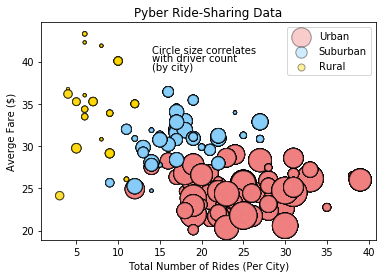

<Figure size 432x288 with 0 Axes>

In [37]:
# Obtain the x and y coordinates for each of the three city types

type_and_city_group = merged_data.groupby(['type', 'city'])

group_calcs = type_and_city_group.agg({'city' : 'count',
                                       'fare' : 'mean'})

group_calcs = group_calcs.rename(columns = {'city' : '# of Rides',
                                            'fare' : 'Average Fare'})

driver_counts = merged_data.drop(['fare', 'ride_id'],
                                 axis = 1)

plot_data = group_calcs.merge(driver_counts,
                              how = 'outer',
                              on = 'city',
                              left_index = True)

plot_data.reset_index(inplace = True)

# Build the scatter plots for each city types

plt.scatter(x = plot_data['# of Rides'][plot_data.type == 'Urban'],
            y = plot_data['Average Fare'][plot_data.type == 'Urban'],
            s = plot_data['driver_count'][plot_data.type == 'Urban'] * 10,
            facecolors = 'lightcoral',
            edgecolors = 'black',
            alpha = .4)

plt.scatter(x = plot_data['# of Rides'][plot_data.type == 'Suburban'],
            y = plot_data['Average Fare'][plot_data.type == 'Suburban'],
            s = plot_data['driver_count'][plot_data.type == 'Suburban'] * 10,
            facecolors = 'lightskyblue',
            edgecolors = 'black',
            alpha = .4)

plt.scatter(x = plot_data['# of Rides'][plot_data.type == 'Rural'],
            y = plot_data['Average Fare'][plot_data.type == 'Rural'],
            s = plot_data['driver_count'][plot_data.type == 'Rural'] * 10,
            facecolors = 'gold',
            edgecolors = 'black',
            alpha = .4)

# Incorporate the other graph properties

plt.title('Pyber Ride-Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Averge Fare ($)')

# Create a legend

plt.legend(['Urban', 'Suburban', 'Rural'],
           loc = 'best')

# Incorporate a text label regarding circle size

plt.text(14, 41, 'Circle size correlates')
plt.text(14, 40, 'with driver count')
plt.text(14, 39, '(by city)')

# Save Figure

plt.show()
plt.savefig('Pyber Data Plot.png')

## Total Fares by City Type

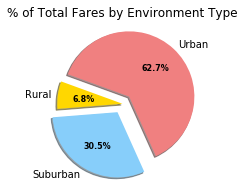

<Figure size 432x288 with 0 Axes>

In [32]:
# Calculate Type Percents

fare_total = merged_data.fare.sum()
fare_sum_by_type = merged_data.groupby('type')['fare'].sum()

percentages = []
for i in fare_sum_by_type:
    percentages.append((i/fare_total) * 100)

# Build Pie Chart

fig, ax = plt.subplots(figsize = (6, 3),
                       subplot_kw = dict(aspect = "equal"))

labels = 'Rural', 'Suburban', 'Urban'

colors = ['gold', 'lightskyblue', 'lightcoral']

data = [x for x in percentages]

ingredients = [x for x in labels]

explode = (0, 0.15, 0.15)

def func(pct, allvals):
    
    absolute = int(pct / 100. * np.sum(allvals))
    
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(data,
                                  explode = explode,
                                  labels = labels,
                                  colors = colors,
                                  autopct = lambda pct: func(pct, data),
                                  textprops = dict(color="black"),
                                  shadow = True,
                                  startangle = 160)

plt.setp(autotexts,
         size = 8,
         weight="bold")

ax.set_title("% of Total Fares by Environment Type")

plt.show()

# Save Figure

plt.savefig('Total Fares.png')

## Total Rides by City Type

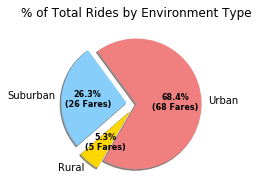

<Figure size 432x288 with 0 Axes>

In [34]:
# Calculate Ride Percents

ride_total = len(plot_data)

urban_ride_total = len(plot_data[plot_data['type'] == 'Urban'])
urban_ride_percentage = (urban_ride_total / ride_total) * 100

suburban_ride_total = len(plot_data[plot_data['type'] == 'Suburban'])
suburban_ride_percentage = (suburban_ride_total / ride_total) * 100

rural_ride_total = len(plot_data[plot_data['type'] == 'Rural'])
rural_ride_percentage = (rural_ride_total / ride_total) * 100 

percentages = [urban_ride_percentage, suburban_ride_percentage, rural_ride_percentage]
labels = ['Urban', 'Suburban', 'Rural']

df = pd.DataFrame({'Labels' : labels,
                   'Percentages' : percentages})

df.set_index(df.Labels, inplace = True)

df.drop('Labels', axis = 1, inplace = True)

# Build Pie Chart

fig, ax = plt.subplots(figsize = (6, 3),
                       subplot_kw = dict(aspect = "equal"))

labels = 'Urban', 'Suburban', 'Rural'

colors = ['lightcoral', 'lightskyblue', 'gold']

data = [x for x in df.Percentages]

ingredients = [x for x in df.index]

explode = (0, 0.15, 0.15)

def func(pct, allvals):
    
    absolute = int(pct / 100. * np.sum(allvals))
    
    return "{:.1f}%\n({:d} Fares)".format(pct,
                                          absolute)

wedges, texts, autotexts = ax.pie(data,
                                  explode = explode,
                                  labels = labels,
                                  colors = colors,
                                  autopct = lambda pct: func(pct, data),
                                  textprops = dict(color="black"),
                                  shadow = True,
                                  startangle = -120)

plt.setp(autotexts,
         size = 8,
         weight="bold")

ax.set_title("% of Total Rides by Environment Type")

plt.show()

# Save Figure

plt.savefig('Total Rides.png')

## Total Drivers by City Type

C:\Users\Nicholas McCarty\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Nicholas McCarty\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nicholas McCarty\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


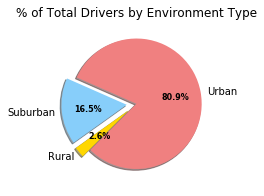

<Figure size 432x288 with 0 Axes>

In [36]:
# Calculate Type Percents

urban_chunk = merged_data[merged_data['type'] == 'Urban']
urban_chunk.drop_duplicates(subset = 'city',
                            inplace = True)
urban_driver_total = urban_chunk.driver_count.sum()

suburban_chunk = merged_data[merged_data['type'] == 'Suburban']
suburban_chunk.drop_duplicates(subset = 'city',
                            inplace = True)
suburban_driver_total = suburban_chunk.driver_count.sum()

rural_chunk = merged_data[merged_data['type'] == 'Rural']
rural_chunk.drop_duplicates(subset = 'city',
                            inplace = True)
rural_driver_total = rural_chunk.driver_count.sum()

driver_total = urban_driver_total + suburban_driver_total + rural_driver_total

percentages = []

percentages.append((urban_driver_total/driver_total) * 100)
percentages.append((suburban_driver_total/driver_total) * 100)
percentages.append((rural_driver_total/driver_total) * 100)

# Build Pie Chart

fig, ax = plt.subplots(figsize = (6, 3),
                       subplot_kw = dict(aspect = "equal"))

labels = 'Urban', 'Suburban', 'Rural'

colors = ['lightcoral', 'lightskyblue', 'gold']

data = [x for x in percentages]

ingredients = [x for x in labels]

explode = (0, 0.15, 0.15)

def func(pct, allvals):
    
    absolute = int(pct / 100. * np.sum(allvals))
    
    return "{:.1f}%".format(pct)

wedges, texts, autotexts = ax.pie(data,
                                  explode = explode,
                                  labels = labels,
                                  colors = colors,
                                  autopct = lambda pct: func(pct, data),
                                  textprops = dict(color="black"),
                                  shadow = True,
                                  startangle = 225)

plt.setp(autotexts,
         size = 8,
         weight="bold")

ax.set_title("% of Total Drivers by Environment Type")

plt.show()

# Save Figure

plt.savefig('Total Drivers.png')

# Conclusions

* 80% of Pyber drivers service customers in the Urban environment.
* Suburban drivers get just over a quarter of total rides, despite only accounting for 16.5% of the driver pool, yet net 30% of total fares.
* As population density increases, number of rides per city increases; average fare decreases.